In [65]:
import json
import skimage.measure
import skimage.io
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_json('files.json', convert_axes=False)

In [8]:
data_dir = os.path.expanduser('~/data/highres/thumbs/256w')

In [163]:
# select all painters that start with an A
files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('A')]
len(files)

1557

In [158]:
images = skimage.io.imread_collection(files)


In [159]:
img = images[0]
img.dtype, img.shape

(dtype('uint8'), (256, 227, 3))

In [160]:
def compute_stats(img):
    stats = {}
    # convert greyscale to rgb
    if len(img.shape) == 2:
        img = skimage.color.gray2rgb(img)
    vector_shape = np.prod(img.shape[:2]), img.shape[2]
    vec_hsv = skimage.color.rgb2hsv(img).reshape(vector_shape)
    vec_lab = skimage.color.rgb2lab(img).reshape(vector_shape)
    stats['h'], stats['s'], stats['v'] = vec_hsv.mean(axis=0)
    stats['l'], stats['a'], stats['b'] = vec_lab.mean(axis=0)
    
    
    return stats
compute_stats(img)
    

{'a': -0.16176667719843527,
 'b': 11.203163198346958,
 'h': 0.17742059093370166,
 'l': 15.67137224583805,
 's': 0.70096651758207806,
 'v': 0.18126383400285412}

In [161]:
rows = []
for i, img in enumerate(images):
    row = compute_stats(img)
    row["index"] = i
    row["filename"] = images.files[i]
    rows.append(row)
stats_df = pd.DataFrame(rows)

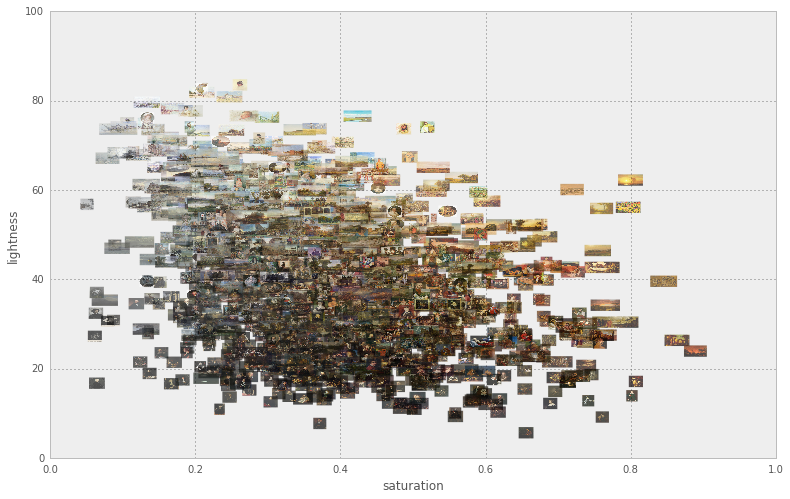

In [162]:
fig, ax = plt.subplots(figsize=(13,8))
#aspect = ax.get_aspect()
for i, row in stats_df.iterrows():
    saturation = row['s']
    lightness = row['l']
    img = images[i]
    w, h = img.shape[1], img.shape[0]
    w = w * 1.0/256 * 1.0/np.sqrt(len(images)) * 1.0
    h = h * 1.0/256 * 1.0/np.sqrt(len(images)) * 100.0
    extra_args = {}
    if len(img.shape) == 2:
        # skip plotting, or plot in gray
        extra_args['cmap'] = 'Greys'
        continue
    ax.imshow(img, extent=(saturation, saturation+w, lightness, lightness+h), alpha=0.7, **extra_args)
_ = ax.axis('auto')
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 100)
ax.set_xlabel('saturation')
ax.set_ylabel('lightness')


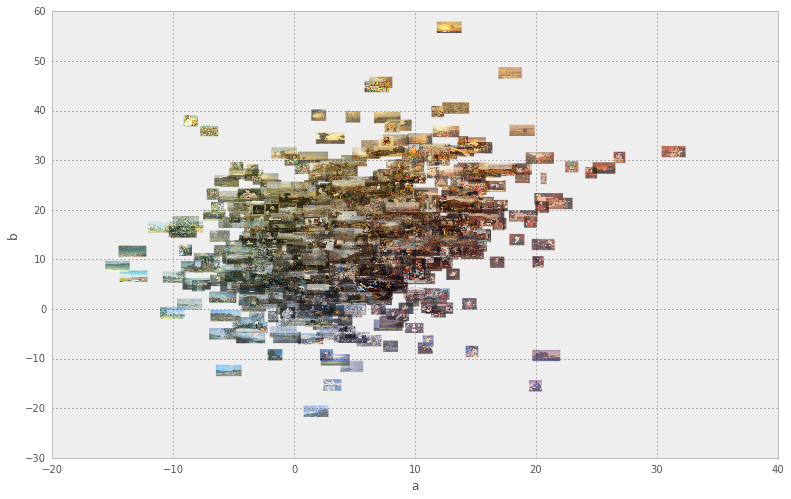

In [172]:
fig, ax = plt.subplots(figsize=(13,8))
#aspect = ax.get_aspect()
for i, row in stats_df.iterrows():
    a = row['a']
    b = row['b']
    img = images[i]
    w, h = img.shape[1], img.shape[0]
    w = w * 1.0/256 * 1.0/np.sqrt(len(images)) * 60.0
    h = h * 1.0/256 * 1.0/np.sqrt(len(images)) * 90.0
    extra_args = {}
    if len(img.shape) == 2:
        # skip plotting, or plot in gray
        extra_args['cmap'] = 'Greys'
        continue
    ax.imshow(img, extent=(a, a+w, b, b+h), alpha=0.7, **extra_args)
_ = ax.axis('auto')
ax.set_xlim(-20, 40)
ax.set_ylim(-30, 60)
ax.set_xlabel('a')
_ = ax.set_ylabel('b')
